In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
def Function(x):
    return np.sin(x)

In [3]:
xi, xf, Npoints = 0.,0.5*np.pi, 10
X = np.linspace(xi,xf,Npoints+1)
Y = Function(X)

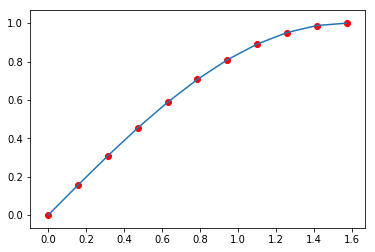

In [4]:
plt.plot(X,Y,label='f(x)')
plt.scatter(X,Y,c='r')

# Implementar el trapecio

In [17]:
def TrapezeMethod(f,X):
    
    h = (X[-1]-X[0])/(len(X)-1)
    
    integral = 0.
    
    integral += 0.5*(f(X[0])+f(X[-1]))
    
    #for i in X[1:-1]:
    #    integral += f(i)
      
    integral += np.sum(f(X[1:-1]))
    
    integral *= h
    
    return integral, h

In [18]:
Integral, h = TrapezeMethod(Function,X)
print(Integral,h,h**2)

(0.9979429863543572, 0.15707963267948966, 0.024674011002723394)


In [20]:
def dFunction(f,x,h):
    
    d = 0
    
    if(h!=0):
        d = ( f(x+h)-2*f(x)+f(x-h) ) / h**2
    return d

In [21]:
D2Y = dFunction(Function,X,0.0001)

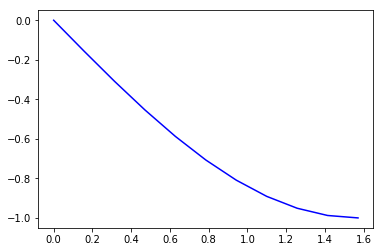

In [22]:
plt.plot(X,D2Y,'b')

In [23]:
max_ = np.max(np.abs(D2Y))
print(max_)

0.999999993922529


In [27]:
def ErrorTraMethod(X,D2Y):
    
    max_ = np.max(np.abs(D2Y))
    
    error = ((X[-1]-X[0])**3 * max_ )/(12.*(len(X)-1)**2)
    
    return error

In [28]:
Error = ErrorTraMethod(X,D2Y)
print(Error)

0.0032298204679020908


$$ I = 0.997 \pm 0.003 $$

# Implementos Simpson 